## Dog or Cat - CNN - Computer Vision

Cat and dog classification is an important problem in the field of computer vision. Nowadays, recognition and classification of pets has become a great area of ​​interest for both academic research and commercial applications. Especially social media and online platforms are places where animal photos are spread rapidly; therefore, automatic classification of such images is critical to improve user experience and facilitate content management.

Convolutional Neural Networks (CNN) are one of the most effective deep learning architectures for analyzing image data. CNNs contain layers designed to recognize local features in images; these layers can perform more complex object recognition tasks by learning the edges, textures and patterns of images.

<img src='dg.jpg' width=550 >

<a href='https://www.kaggle.com/datasets/anthonytherrien/dog-vs-cat' target=_blank>You can find the data file here</a>

### Import Libraries

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Input, Reshape, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from IPython.display import Image
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import save_model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import warnings
warnings.filterwarnings('ignore')

### Reading the pictures and labels

In [12]:
labels=['cat','dog']
img_path='animal/'

In [13]:
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(img_path+label):
        img_list.append(img_path+label+'/'+img_file)
        label_list.append(label)

In [14]:
df=pd.DataFrame({'img':img_list,'label':label_list})

In [15]:
df.head()

,img,label
0,animal/cat/00000-4122619873.png,cat
1,animal/cat/00001-4122619874.png,cat
2,animal/cat/00002-4122619875.png,cat
3,animal/cat/00003-4122619876.png,cat
4,animal/cat/00004-4122619877.png,cat


In [16]:
df.tail()

,img,label
995,animal/dog/00995-127787249.png,dog
996,animal/dog/00996-127787250.png,dog
997,animal/dog/00997-127787251.png,dog
998,animal/dog/00998-127787252.png,dog
999,animal/dog/00999-127787253.png,dog


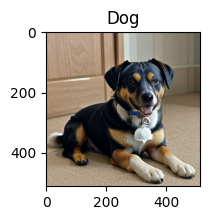

In [17]:
d='animal/dog/00997-127787251.png'
plt.figure(figsize=(2,2))
plt.imshow(plt.imread(d))
plt.title('Dog')
plt.show()

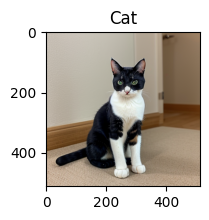

In [18]:
c='animal/cat/00004-4122619877.png'
plt.figure(figsize=(2,2))
plt.imshow(plt.imread(c))
plt.title('Cat')
plt.show()

### Label Encoding

In [19]:
d={'cat':1, 'dog':0}

In [20]:
df['encode_label']=df['label'].map(d)

In [21]:
df.head()

,img,label,encode_label
0,animal/cat/00000-4122619873.png,cat,1
1,animal/cat/00001-4122619874.png,cat,1
2,animal/cat/00002-4122619875.png,cat,1
3,animal/cat/00003-4122619876.png,cat,1
4,animal/cat/00004-4122619877.png,cat,1


In [46]:
df.sample(5)

,img,label,encode_label
165,animal/cat/00165-200124475.png,cat,1
160,animal/cat/00160-200124470.png,cat,1
847,animal/dog/00847-3846169009.png,dog,0
893,animal/dog/00893-3846169055.png,dog,0
972,animal/dog/00972-3846169134.png,dog,0


In [22]:
x=[]
for img in df['img']:  
    img=cv2.imread(img) 
    img=cv2.resize(img,(32,32))  
    img=img/255.0  
    x.append(img)

### Modelling

In [23]:
x=np.array(x)

In [24]:
y=df['encode_label']

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [26]:
model=Sequential()
model.add(Input(shape=(32,32,3))) 
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(2,activation='softmax'))   
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [27]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=7,verbose=1)

Epoch 1/7
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.5432 - loss: 0.7452 - val_accuracy: 0.7800 - val_loss: 0.5353
Epoch 2/7
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.8144 - loss: 0.4767 - val_accuracy: 0.8900 - val_loss: 0.3606
Epoch 3/7
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.8704 - loss: 0.3480 - val_accuracy: 0.8650 - val_loss: 0.3383
Epoch 4/7
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.8933 - loss: 0.2953 - val_accuracy: 0.8800 - val_loss: 0.2655
Epoch 5/7
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9161 - loss: 0.2305 - val_accuracy: 0.8500 - val_loss: 0.3502
Epoch 6/7
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9079 - loss: 0.1953 - val_accuracy: 0.9250 - val_loss: 0.2186
Epoch 7/7
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9388 - loss: 0.1481 - val_accuracy: 0.9000 - val_loss: 0.2102


In [28]:
loss,accuracy=model.evaluate(x_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9043 - loss: 0.1931 
Test Loss: 0.21021093428134918
Test Accuracy: 0.8999999761581421


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 944,072 (3.60 MB)

 Trainable params: 314,690 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 629,382 (2.40 MB)

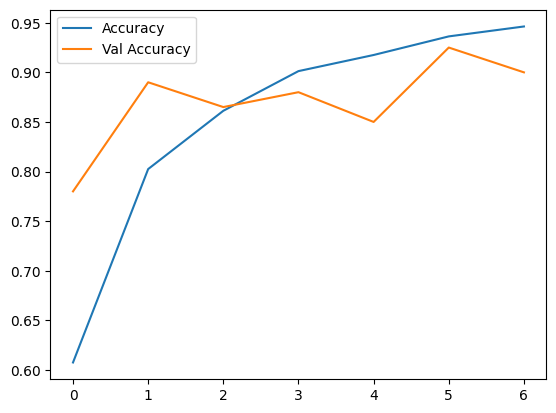

In [30]:
plt.plot(history.history['accuracy'],label='Accuracy') 
plt.plot(history.history['val_accuracy'],label='Val Accuracy') 
plt.legend()

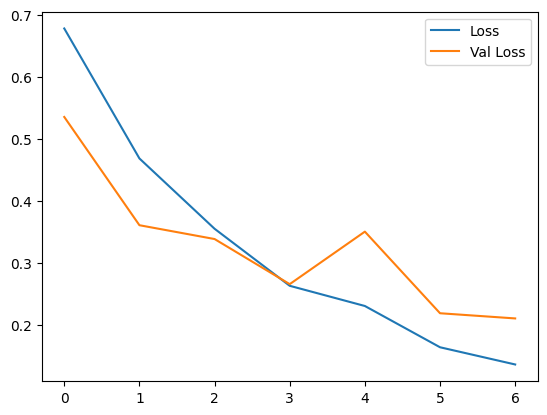

In [31]:
plt.plot(history.history['loss'],label='Loss') 
plt.plot(history.history['val_loss'],label='Val Loss') 
plt.legend()

In [32]:
pred=model.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [33]:
confusion_matrix(y_test,np.argmax(pred,axis=1))

array([[99,  5],
       [15, 81]], dtype=int64)

In [34]:
print(classification_report(y_test, np.argmax(pred,axis=1)))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       104
           1       0.94      0.84      0.89        96

    accuracy                           0.90       200
   macro avg       0.91      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



<Axes: >

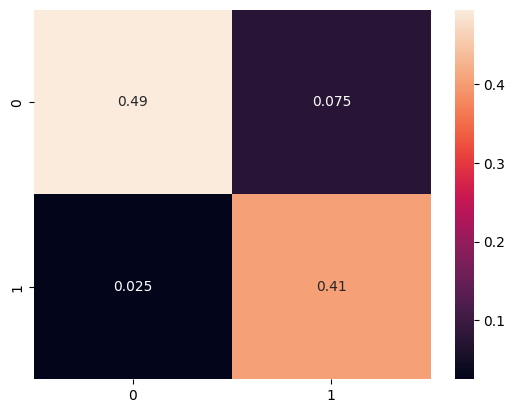

In [35]:
cm = confusion_matrix(np.argmax(pred,axis=1), y_test)
normalized_cm = cm / cm.sum()
sns.heatmap(normalized_cm, annot=True)

In [58]:
model.save('dog_or_cat.h5')

### Transfer Learning

In [37]:
data_dir='animal'
img_width,img_height=32,32
train_datagen=ImageDataGenerator(rescale=1/255,validation_split=.20)

train_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_height),
                                class_mode='binary', subset='training')

test_datagen=ImageDataGenerator(rescale=1/255)
test_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_height),
                                class_mode='binary', subset='validation')

base_model=ResNet50(weights='imagenet', input_shape=(img_width,img_height,3),include_top=False) 

model=Sequential()

model.add(base_model)
for layer in base_model.layers:
    layer.trainable=False  
    
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

model.fit(train_datagenerator,epochs=13,validation_data=test_datagenerator)

Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/13
25/25 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.5877 - loss: 1.3256 - val_accuracy: 0.5000 - val_loss: 0.8575
Epoch 2/13
25/25 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.5725 - loss: 0.6959 - val_accuracy: 0.6200 - val_loss: 0.6408
Epoch 3/13
25/25 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.6346 - loss: 0.6208 - val_accuracy: 0.7250 - val_loss: 0.5609
Epoch 4/13
25/25 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.6445 - loss: 0.6114 - val_accuracy: 0.5750 - val_loss: 0.7874
Epoch 5/13
25/25 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.6341 - loss: 0.6559 - val_accuracy: 0.7100 - val_loss: 0.5703
Epoch 6/13
25/25 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.6944 - loss: 0.5594 - val_accuracy: 0.7800 - val_loss: 0.5126
Epoch 7/13
25/25 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.7231 - loss: 0.5371 - val_accuracy: 0.7350 - val_loss: 0.5199
Epoch 8/13
25/25 ━━━━━━━━━━━━━━━━━━

In [42]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 1, 1, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,885,317 (114.00 MB)

 Trainable params: 2,099,201 (8.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 4,198,404 (16.02 MB)

In [43]:
test_loss, test_acc=model.evaluate(test_datagenerator, verbose=2)
print('Test Accuracy:', test_acc)
print('Test Loss:', test_loss)

7/7 - 6s - 837ms/step - accuracy: 0.7200 - loss: 0.5083
Test Accuracy: 0.7200000286102295
Test Loss: 0.508255660533905


In [59]:
model.save('dog_cat.keras')

### Predict the Images

In [47]:
img=image.load_img('animal/dog/00847-3846169009.png', target_size=(224,224))
img=image.img_to_array(img)
img=np.expand_dims(img, axis=0)

In [48]:
model=VGG16(weights='imagenet')

In [49]:
pred=model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [50]:
decode_predictions(pred, top=1)

[[('n02093428', 'American_Staffordshire_terrier', 0.59136784)]]

In [51]:
img=image.load_img('animal/cat/00165-200124475.png', target_size=(224,224))
img=image.img_to_array(img)
img=np.expand_dims(img, axis=0)

In [52]:
model=VGG16(weights='imagenet')

In [53]:
pred=model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [54]:
decode_predictions(pred, top=1)

[[('n02124075', 'Egyptian_cat', 0.5011961)]]

In [57]:
#The model correctly predicted the pictures we gave.

### Summary

In this study, we used CNN architecture to classify cat and dog images. The model was trained on the dataset and learned the features of the images and gained the ability to distinguish cats and dogs. During the training process, we applied data augmentation techniques and optimization algorithms to increase the accuracy of the model. As a result, our model achieved 90% success. Then we applied transfer learning. We also obtained good results with transfer learning. Our model predicted the images we gave correctly and we completed our project.